# Red Wine Quality Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [4]:
wine_ds = pd.read_csv("winequality.csv")
wine_ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
cp_wine_ds = wine_ds.copy()
cp_wine_ds.shape

(1599, 12)

In [6]:
cp_wine_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# checking descritve analysis
cp_wine_ds.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Univariate analysis

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<AxesSubplot:>

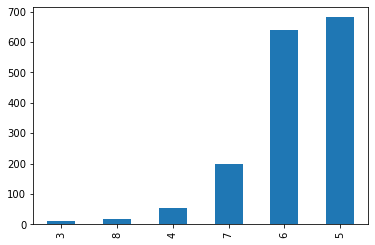

In [9]:
# checking the class label
print(cp_wine_ds.quality.value_counts())
cp_wine_ds.quality.value_counts().sort_values().plot(kind = "bar")

Observation
5,6 and 7 quality are higher in the dataset and contrubutes to 94% of the overall data points

In [10]:
# conveting the class label's multiple value in to binery format
# 1 == good wine and 0 == not good wine
def convert_class(x):
    if x >=7:
        return 1
    else:
        return 0
cp_wine_ds["quality"] = cp_wine_ds["quality"].map(convert_class)
print(cp_wine_ds["quality"].value_counts()/len(wine_ds)*100)

0    86.429018
1    13.570982
Name: quality, dtype: float64


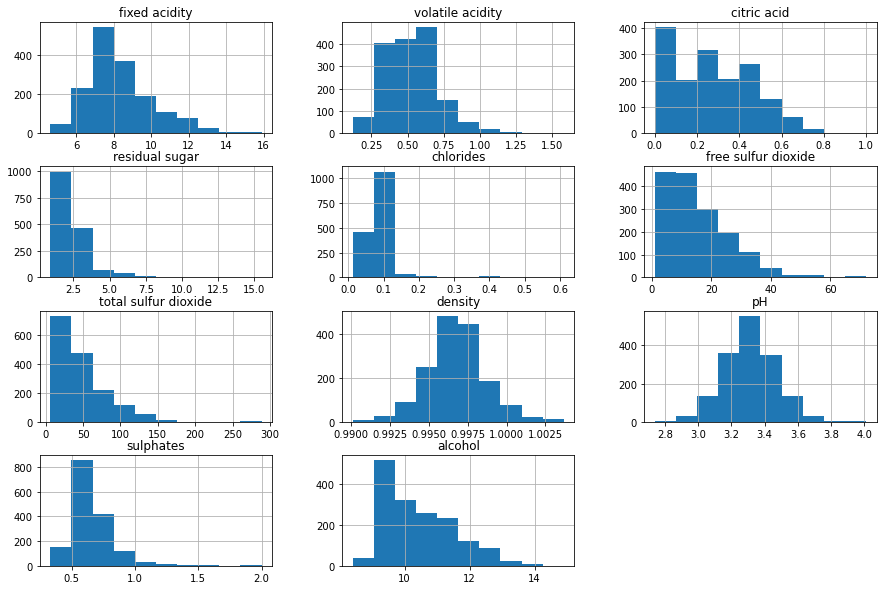

In [11]:
cp_wine_ds.iloc[:,:-1].hist(figsize = (15,10));

Observation

All the the features are right skewed feature
We will use powertransformer to transform the data

In [12]:
skew = cp_wine_ds.iloc[:,:-1].skew()*100
skew

fixed acidity            98.275144
volatile acidity         67.159257
citric acid              31.833730
residual sugar          454.065543
chlorides               568.034657
free sulfur dioxide     125.056729
total sulfur dioxide    151.553126
density                   7.128766
pH                       19.368350
sulphates               242.867235
alcohol                  86.082881
dtype: float64

<AxesSubplot:>

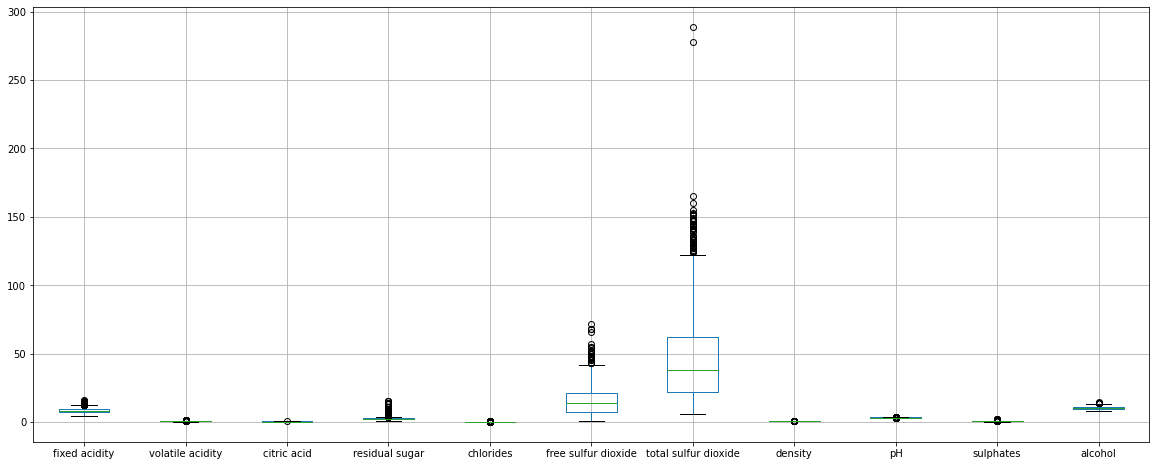

In [13]:
# since all features are numeric so plotting Boxplot
cp_wine_ds.iloc[:,:-1].boxplot(figsize = (20,8)) 

Observation
We see that, columns have the outlier values,we need to treat it
we will treat it with Zscore
scale of the columns are different, we will scaler all the feature to bring every feature at same scale

In [14]:
z_score = np.abs(zscore(cp_wine_ds))

# keeping only those data point which are smaller or equal to 3 SD away from the mean
cp_wine_ds = cp_wine_ds[(z_score <= 3 ).all(axis = 1)] 


print((len(wine_ds)-len(cp_wine_ds))/len(wine_ds)*100," Data lose post removal of outlier")

8.818011257035648  Data lose post removal of outlier


Observation

we have applied zscore for outlier treatment
post outlier treatmen, we lost approx 9% data from the original data

# Bivariate analysis

<AxesSubplot:>

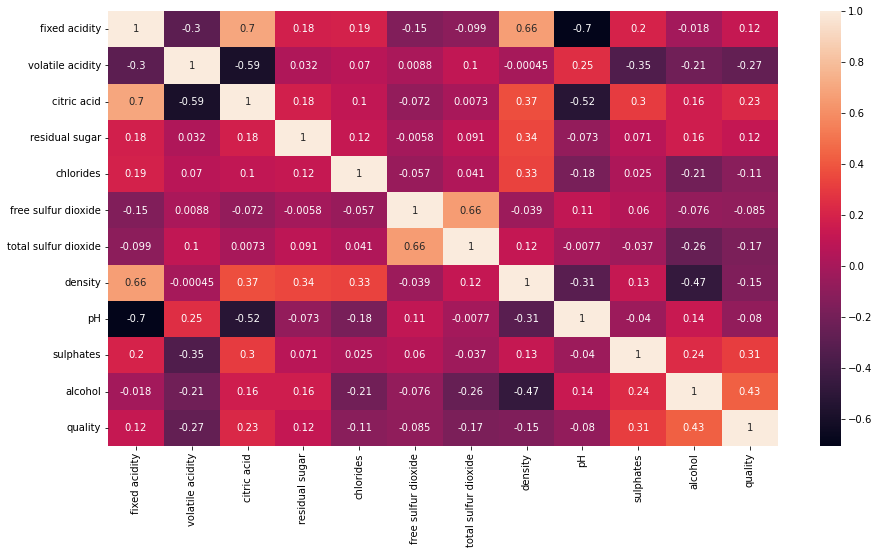

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(cp_wine_ds.corr(),annot= True)

Observation

Alhocol, sulphate, citric acid, residual sugar and fixed acid have positive correlation
other features are having negative correlation

# Data preparation for model

In [16]:
PT = PowerTransformer(method ='yeo-johnson',standardize=False)
X = PT.fit_transform(cp_wine_ds.iloc[:,:-1])
y = cp_wine_ds["quality"]

# Scalling the data

sc = StandardScaler() # creating the instance
X = sc.fit_transform(X) # transforming X

# dividing data into train & test and for that we are train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.22, random_state = 155) # faa spliting

# Modeling & Evaluations

In [17]:
models = [LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),AdaBoostClassifier()]

for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("Accuracy score",model, "=",accuracy_score(pred,y_test))
    print("Classification report",model,"\n",classification_report(pred,y_test))
    print("confusion matrix",model,"\n",confusion_matrix(pred,y_test))
    print("\n")

Accuracy score LogisticRegression() = 0.881619937694704
Classification report LogisticRegression() 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       289
           1       0.43      0.56      0.49        32

    accuracy                           0.88       321
   macro avg       0.69      0.74      0.71       321
weighted avg       0.90      0.88      0.89       321

confusion matrix LogisticRegression() 
 [[265  24]
 [ 14  18]]


Accuracy score DecisionTreeClassifier() = 0.8535825545171339
Classification report DecisionTreeClassifier() 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       274
           1       0.50      0.45      0.47        47

    accuracy                           0.85       321
   macro avg       0.70      0.69      0.69       321
weighted avg       0.85      0.85      0.85       321

confusion matrix DecisionTreeClassifier() 
 [[253  21]
 [ 26  21]]


A

# hyper paramter tuning

In [18]:
RF = RandomForestClassifier() # Randomforest instance
from sklearn.model_selection import RandomizedSearchCV,cross_val_score

# we are checking best parameter which suited most for the model

para = {
        "criterion":["gini","entropy"],
        "max_features" : ["auto", "sqrt", "log2"],
        "min_samples_split" :[2,4,6,8], 
        "max_depth" :[2,3,4,5],
        "min_samples_leaf":[3,5,8,10],
        "max_samples" :[0.2,0.3,0.4,0.5]
}

grid = RandomizedSearchCV(RF, para, scoring= "accuracy" )

grid.fit(X_train,y_train)
# pred = RF.predict(X_test)
# print("Accuracy score ",accuracy_score(pred,y_test))
# print("\n")
# print("Classification report\n",classification_report(pred,y_test))

C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_samples': [0.2, 0.3, 0.4, 0.5],
                                        'min_samples_leaf': [3, 5, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8]},
                   scoring='accuracy')

In [19]:
print("best- parameter",grid.best_params_)
print("score",grid.best_score_)

best- parameter {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_samples': 0.3, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'entropy'}
score 0.8847824406832057


In [20]:
best_parameter_RF = RandomForestClassifier(min_samples_split= 8, min_samples_leaf = 3, max_samples =0.4, max_features = 'auto',max_depth = 5, criterion = 'entropy')

for i in range(2,7):
    cv = cross_val_score(best_parameter_RF,X,y,cv=5)
    print(f'at CV {i} The mean is  {cv.mean()} and the SD is {cv.std()}') 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

at CV 2 The mean is  0.8758579296709504 and the SD is 0.0033271729096800047


C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

at CV 3 The mean is  0.8806595113684509 and the SD is 0.00396597811014903


C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

at CV 4 The mean is  0.8765358000282447 and the SD is 0.005484608998958736


C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

at CV 5 The mean is  0.8744739443581414 and the SD is 0.009260926085955117


C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

at CV 6 The mean is  0.8744857129407334 and the SD is 0.006361897643806915


In [21]:
# cross validation
cv = cross_val_score(best_parameter_RF,X,y,cv=3)
print(f'The mean is {cv.mean()} and the SD is {cv.std()}') 

C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

The mean is 0.8840877914951989 and the SD is 0.008287411504523003


C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


<BarContainer object of 11 artists>

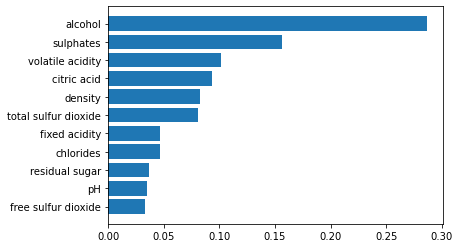

In [22]:
# taking the important feature 
best_parameter_RF.fit(X,y)
sort_index = best_parameter_RF.feature_importances_.argsort()
plt.barh(wine_ds.iloc[:,:-1].columns[sort_index], best_parameter_RF.feature_importances_[sort_index])

Observation
Top 5 important featuer are below
Alcohol, sulphates,volatile acidity,density and citric acid are major contributor features.

# Model Saving

In [24]:
import pickle
filename = "Wine_quality.pkl"
pickle.dump(best_parameter_RF,open(filename,'wb'))